In [107]:
from sklearn.datasets import make_regression
import numpy as np

In [109]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

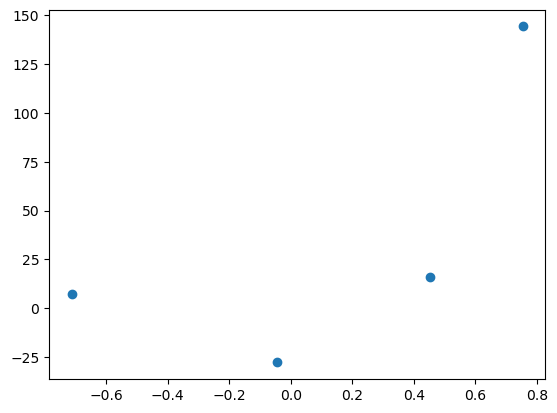

In [111]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [112]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [115]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [117]:
print(reg.coef_)
print(reg.intercept_)

[78.35063668]
26.15963284313262


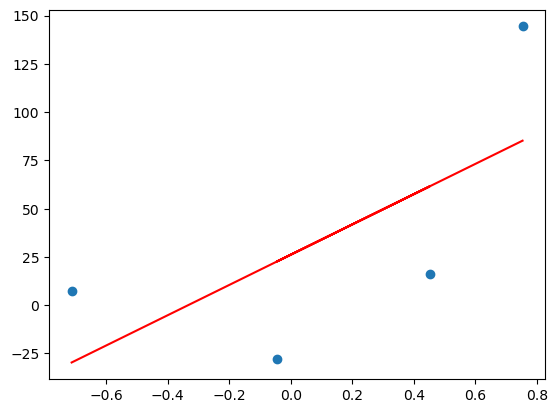

In [119]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='Red')

In [120]:
# let's apply GD assuming slope=78.35
# and let's assume the starting value of intercept b = 0
y_pred = ((78.35*X) + 0).reshape(4)

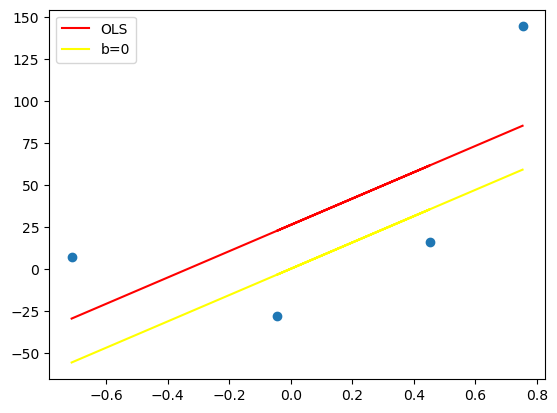

In [123]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='yellow',label='b=0')
plt.legend()
plt.show()

In [124]:
# finding loss in slope
m = 78.35
b = 0

loss_slope = -2 * np.sum(y-m*X.ravel()-b)
loss_slope

-209.27763408209216

In [125]:
# let's take the learning rate = 0.1
lr = 0.1

step_size = lr*loss_slope
step_size

-20.927763408209216

In [126]:
# calculating the new intercept
b = b - step_size
b

20.927763408209216

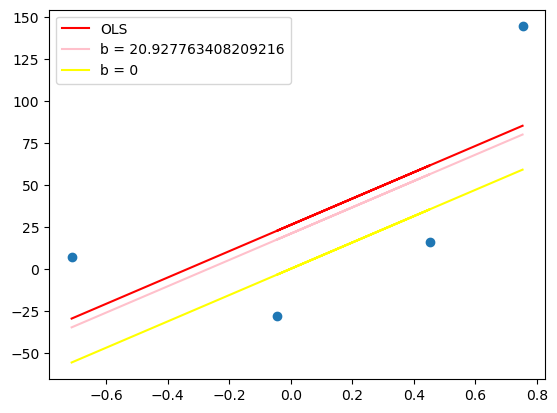

In [131]:
y_pred1 = ((78.35*X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='pink',label='b = {}'.format(b))
plt.plot(X,y_pred,color='yellow',label='b = 0')
plt.legend()
plt.show()

In [132]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-41.85552681641843

In [133]:
step_size = loss_slope*lr
step_size

-4.185552681641844

In [137]:
b = b - step_size
b

25.11331608985106

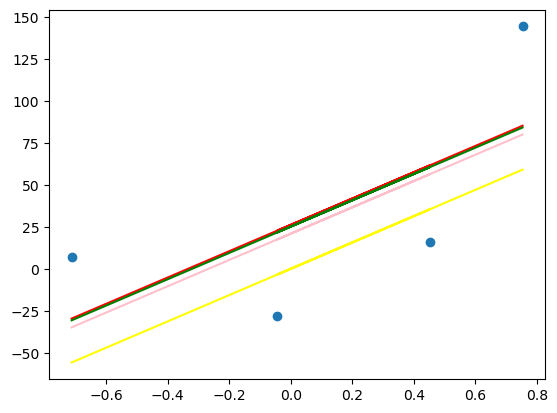

In [139]:
y_pred2 = ((78.35 * X ) + b).reshape(4)


plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='yellow',label='b = 0')
plt.plot(X,y_pred1,color='pink',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='green',label='b={}'.format(b))

In [147]:
# Iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-8.371105363283675

In [149]:
step_size = lr*loss_slope
step_size

-0.8371105363283675

In [153]:
b = b- step_size
b

26.787537162507796

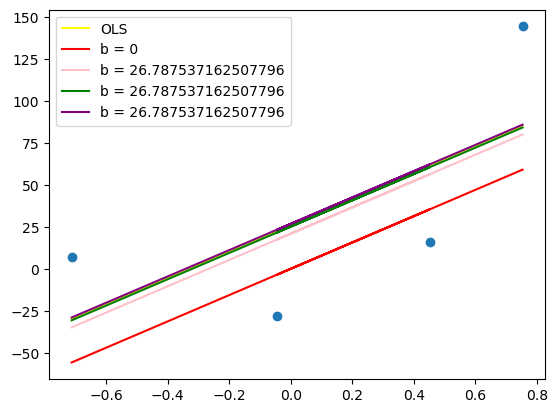

In [161]:
y_pred3 = (((78.35)*X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='yellow',label='OLS')
plt.plot(X,y_pred,color='red',label='b = 0')
plt.plot(X,y_pred1,color='pink',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='green',label='b = {}'.format(b))
plt.plot(X,y_pred3,color='purple',label='b = {}'.format(b))
plt.legend()
plt.show()

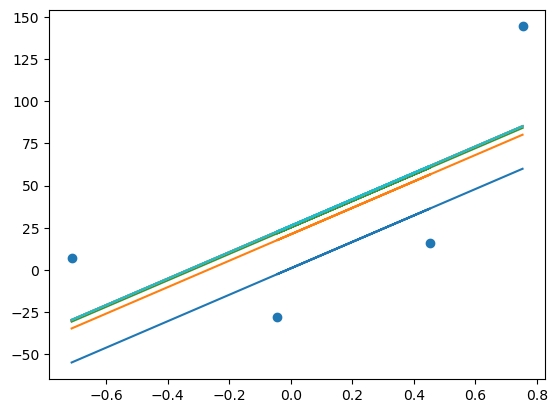

In [163]:
# using loop

b = -100
m = 78.35
lr = 0.1

epochs=10

for i in range(epochs):
    loss_slope = -2*np.sum(y-m*X.ravel()-b)
    b = b-(lr*loss_slope)
    
    y_pred = m * X + b

    plt.plot(X,y_pred)

plt.scatter(X,y)